In [ ]:
!pip install prophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

In [ ]:
df_daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

In [ ]:
df_daily_sales.columns = ['ds', 'y']

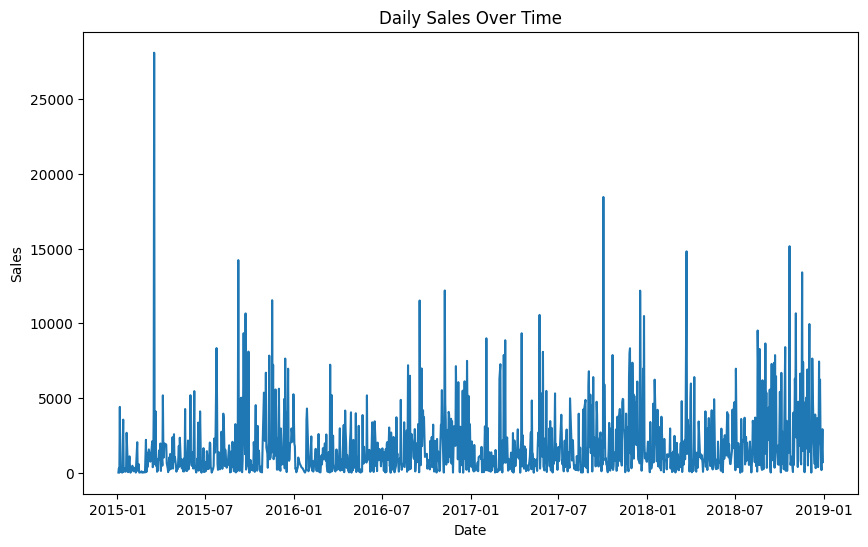

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_daily_sales['ds'], df_daily_sales['y'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales Over Time')
plt.show()

In [ ]:
model = Prophet()

In [ ]:
model.fit(df_daily_sales)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt3w8zmxe/1zxch2ct.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt3w8zmxe/iscm3qv7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24732', 'data', 'file=/tmp/tmpt3w8zmxe/1zxch2ct.json', 'init=/tmp/tmpt3w8zmxe/iscm3qv7.json', 'output', 'file=/tmp/tmpt3w8zmxe/prophet_modelrwfi2qni/prophet_model-20240521121731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:17:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:17:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=365)

In [ ]:
forecast = model.predict(future)

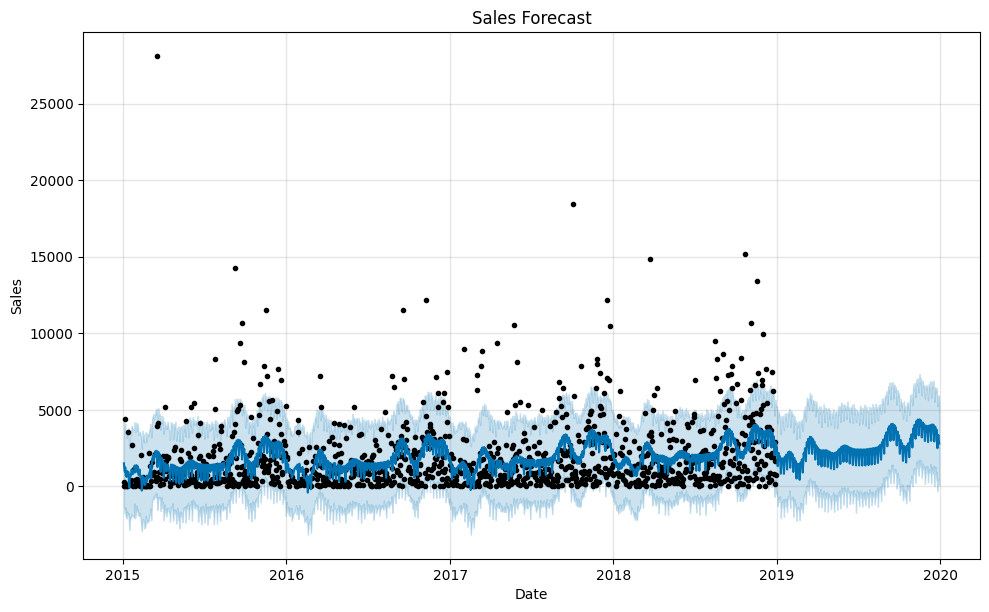

In [ ]:
fig = model.plot(forecast)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

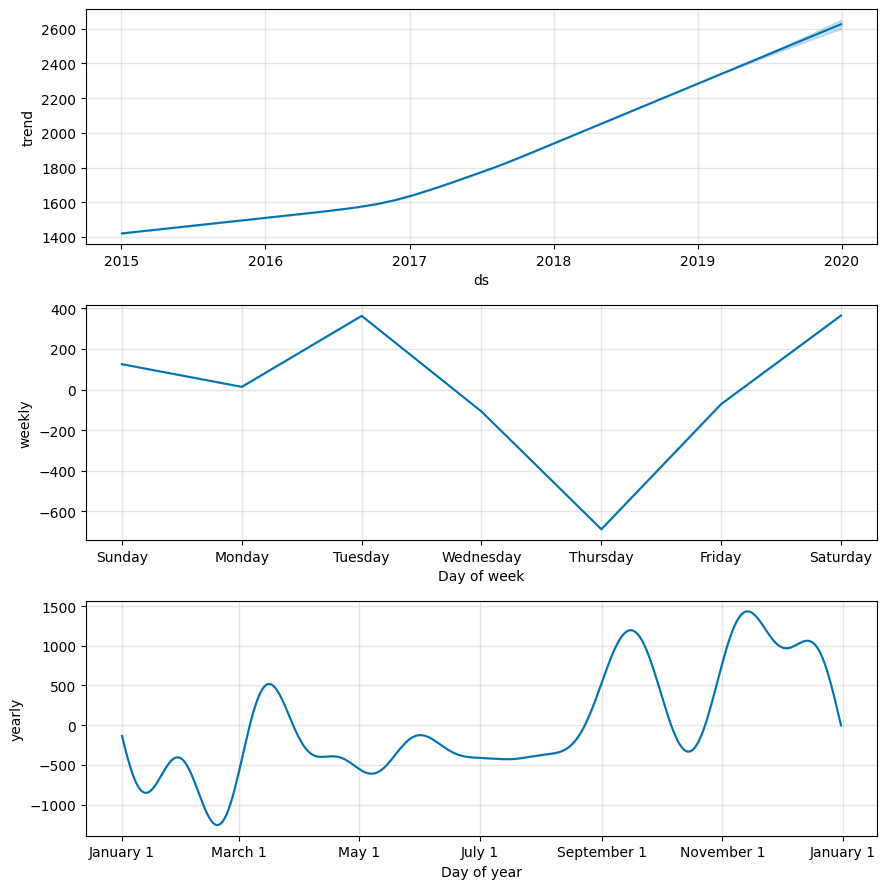

In [ ]:
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('sales_forecast.csv', index=False)


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-03,1499.158340,-1382.072736,4198.184934
1,2015-01-04,1164.787807,-1506.302298,3802.516881
2,2015-01-05,964.737728,-1781.231251,3716.628459
3,2015-01-06,1232.929334,-1377.516014,4065.727772
4,2015-01-07,689.272415,-1951.466060,3376.012005
